# correlation matrix and eliminating correlated features took about 5 hours
## it is needed to run the whole notebook again ...

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
import os

In [2]:
path = 'D:/2024/Research/25-05-2024/SpeechRecognition/CREMA-D/'
audio_path = []
audio_emotion = []

In [3]:
# collects all the audio filename in the variable 'path'
directory_path = os.listdir(path)

In [4]:
for audio in directory_path:
    audio_path.append(path + audio)
    emotion = audio.split('_')
    if emotion[2] == 'SAD':
        audio_emotion.append("sad")
    elif emotion[2] == 'ANG':
        audio_emotion.append("angry")
    elif emotion[2] == 'DIS':
        audio_emotion.append("disgust")
    elif emotion[2] == 'NEU':
        audio_emotion.append("neutral")
    elif emotion[2] == 'HAP':
        audio_emotion.append("happy")
    elif emotion[2] == 'FEA':
        audio_emotion.append("fear")
    else:
        audio_emotion.append("unknown")

In [5]:
emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
#print(len(dataset))
print(dataset.head())
# print(dataset['File Path'][55])

                                                Path Emotions
0  D:/2024/Research/25-05-2024/SpeechRecognition/...    angry
1  D:/2024/Research/25-05-2024/SpeechRecognition/...  disgust
2  D:/2024/Research/25-05-2024/SpeechRecognition/...     fear
3  D:/2024/Research/25-05-2024/SpeechRecognition/...    happy
4  D:/2024/Research/25-05-2024/SpeechRecognition/...  neutral


## Visualization

<Axes: title={'center': 'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

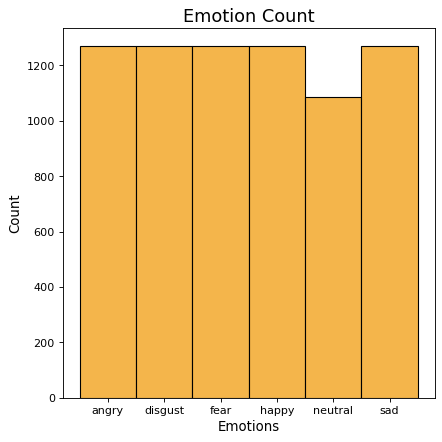

In [6]:
# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions, color='#F19C0E')
#plt.show()

## Showing spectrogram and waveplot

In [7]:
emotion_sad = dataset[dataset['Emotions']=='sad']['Path']
print(type(emotion_sad))

<class 'pandas.core.series.Series'>


In [8]:
#choosing a file to plot wave and spectogram
#print(emotion_sad.values[65])
data_path = emotion_sad.values[542]
data, sampling_rate = librosa.load(data_path)

### Waveplot

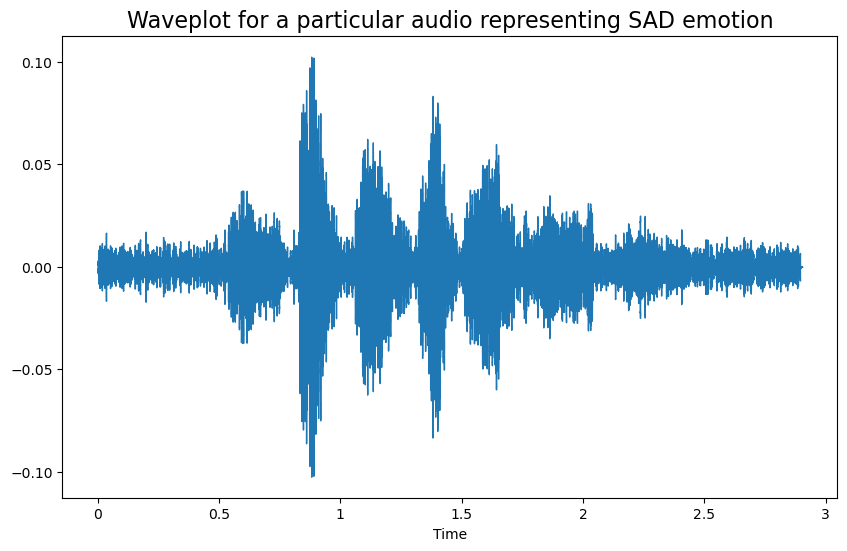

In [9]:
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing SAD emotion", size=16)
librosa.display.waveshow(data, sr=sampling_rate)
#plt.show()

### Spectogram

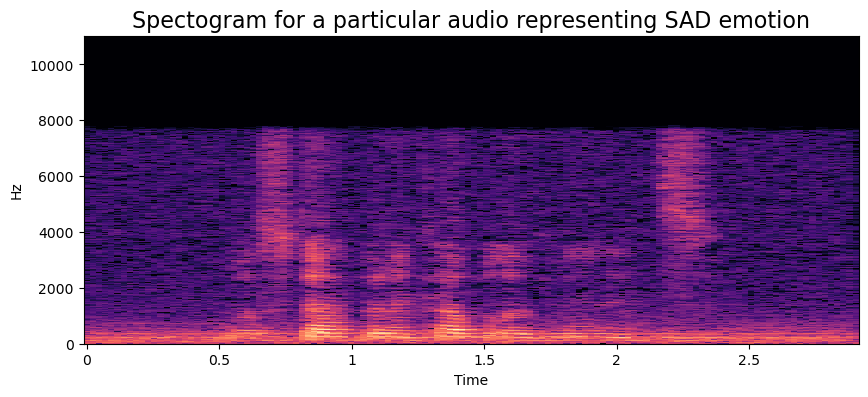

In [10]:
plt.figure(figsize=(10,4))
plt.title("Spectogram for a particular audio representing SAD emotion", size=16)
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(S_db, sr = sampling_rate, x_axis='time', y_axis='hz')
#plt.show()

## Augmentation (Noise Injection)

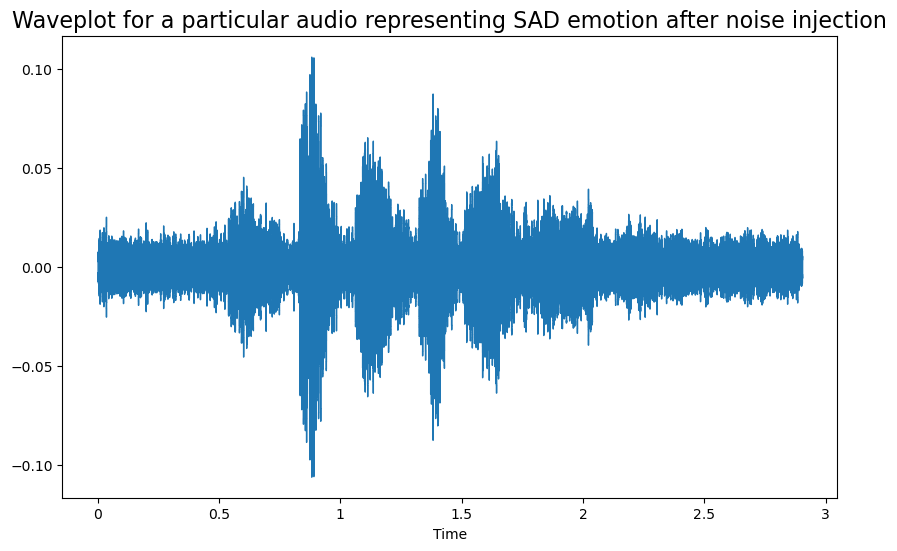

In [11]:
# for audio processing accuracy
# add noise to audio and check how the waveplot changes
# also the observing the change in audio quality

## Augmentation (Noise Injection)
noise_amp = 0.035*np.random.uniform()*np.amax(data)
audio_injected_data = data + noise_amp*np.random.normal(size=data.shape[0])

# waveplot view after noise injection:
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing SAD emotion after noise injection", size=16)
librosa.display.waveshow(audio_injected_data, sr=sampling_rate)
plt.show()

## Feature extraction

### Creating a DF with extracted Feautures

In [12]:
X, Y = [], []
print("Feature processing...")

for path, emo, index in zip(dataset.Path, dataset.Emotions, range(len(dataset))):
    value, sample = librosa.load(path)
    # noise injection
    noise_amp = 0.035 * np.random.uniform() * np.amax(value)
    value = value + noise_amp * np.random.normal(size=value.shape[0])
    # mfcc
    mfcc = librosa.feature.mfcc(y=value, sr= sample, n_mfcc=13, n_fft=200, hop_length=512)
    mfcc = np.ravel(mfcc.T)
    # mel
    mel = librosa.feature.melspectrogram(y=value, sr=sample, hop_length = 256, n_fft = 512, n_mels=64)
    mel = librosa.power_to_db(mel ** 2)
    mel = np.ravel(mel).T
    result = np.array([])
    result = np.hstack((result, mfcc, mel))
    #print(result)
    result = np.array(result)
    X.append(result)
    Y.append(emo)

Feature processing...


In [13]:
# print(X)
# print(Y)
extracted_audio_df = pd.DataFrame(X)
extracted_audio_df["emotion_of_audio"] = Y
print(extracted_audio_df.shape)
print(extracted_audio_df.tail(10))
extracted_audio_df = extracted_audio_df.fillna(0)
#print(extracted_audio_df.isna().any())

(7442, 30457)
               0          1          2          3          4          5  \
7432 -682.375110 -55.817811 -21.539213  12.940556  22.217756   3.642860   
7433 -643.728960 -90.377492  -9.021109  23.685904  11.744224  -5.336951   
7434 -761.308911 -29.135972  -6.372705  17.978381 -11.312235  10.833097   
7435 -743.442413 -73.635209  -5.794291  20.659464  12.295776  -1.547899   
7436 -676.949755 -63.880220 -16.762993  14.311514  10.330911 -17.370066   
7437 -711.051438 -77.254608 -23.100621  19.750014  17.838896  14.422654   
7438 -715.843703 -49.166154  -7.931190  29.415526  15.639863 -12.438216   
7439 -689.037295 -74.172139  -8.379409  10.411871  22.802889  -1.267257   
7440 -639.341032 -78.654638 -32.566246  31.573504   7.782556 -10.369216   
7441 -733.070863 -78.264628  -6.499476  21.708410  12.230145   8.851098   

              6          7          8          9  ...  30447  30448  30449  \
7432  -6.415320  -8.153307 -10.638809  -2.760802  ...    NaN    NaN    NaN   
7433

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold

### Data splitting

In [15]:
%%time
X = extracted_audio_df.drop(labels='emotion_of_audio', axis= 1)
Y = extracted_audio_df['emotion_of_audio']

X_train, X_test, y_train, y_test = train_test_split(np.array(X), Y, test_size=0.2)

CPU times: total: 7.03 s
Wall time: 7.04 s


### Data Normalization

In [16]:
%%time
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

CPU times: total: 2.36 s
Wall time: 2.37 s


((5953, 30456), (1489, 30456))

# Feature Selection 

In [17]:
from sklearn.decomposition import PCA

### Feature Reduction by PCA ... n_componenet = 2

In [18]:
# ideally, n_components should be 7 in our case .... Mona
pca2 = PCA(n_components = 2, random_state=42)
pca2.fit(X_train)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=42, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=2, random_state=42)

In [19]:
X_train_pca2 = pca2.transform(X_train)
X_test_pca2 = pca2.transform(X_test)
X_train_pca2.shape, X_test_pca2.shape

((5953, 2), (1489, 2))

# Model creation and fitting

In [22]:
%%time
mlp_model_pca2 = MLPClassifier(activation='relu',
                         solver='sgd',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fit mlp model
mlp_model_pca2.fit(X_train_pca2,y_train)

CPU times: total: 24.4 s
Wall time: 4.08 s


MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000, solver='sgd')

# Accuracy calculation

In [24]:
y_pred_pca2 = mlp_model_pca2.predict(X_test_pca2)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_pca2)

# the accuracy didn't turn out to be that good :(
print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(mlp_model_pca2).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 40.56%


## Prediction verification

In [25]:
# the prediction made by the model:
print("The Prediction Made By Model: ")
print("<<<===========================================>>>")
df_pca2 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_pca2})
print(df_pca2.head())

The Prediction Made By Model: 
<<<===========================================>>>
       Actual  Predict
7366    angry    angry
1251    angry    angry
4116  disgust  disgust
2470  disgust  disgust
1166    happy    happy


### Feature Reduction by PCA ... n_componenet = 10

In [27]:
pca10 = PCA(n_components = 10, random_state = 42)
pca10.fit(X_train)
PCA(copy=True, iterated_power='auto', n_components=10, random_state=42, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=10, random_state=42)

In [32]:
pca100 = PCA(n_components = 100, random_state = 42)
pca100.fit(X_train)
PCA(copy=True, iterated_power='auto', n_components = 100, random_state=42, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=100, random_state=42)

In [28]:
X_train_pca10 = pca10.transform(X_train)
X_test_pca10 = pca10.transform(X_test)
X_train_pca10.shape, X_test_pca10.shape

((5953, 10), (1489, 10))

In [34]:
X_train_pca100 = pca100.transform(X_train)
X_test_pca100 = pca100.transform(X_test)
X_train_pca100.shape, X_test_pca100.shape

((5953, 100), (1489, 100))

## Model creation and fitting

In [29]:
%%time
mlp_model_pca10 = MLPClassifier(activation='relu',
                         solver='sgd',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fit mlp model
mlp_model_pca10.fit(X_train_pca10,y_train)

CPU times: total: 34.2 s
Wall time: 5.7 s


MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000, solver='sgd')

In [35]:
%%time
mlp_model_pca100 = MLPClassifier(activation='relu',
                         solver='sgd',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fit mlp model
mlp_model_pca100.fit(X_train_pca100,y_train)

CPU times: total: 1min 30s
Wall time: 15.1 s


MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000, solver='sgd')

# Accuracy calculation

In [31]:
y_pred_pca10 = mlp_model_pca10.predict(X_test_pca10)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_pca10)

# the accuracy didn't turn out to be that good :(
print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(mlp_model_pca10).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 40.56%


In [36]:
y_pred_pca100 = mlp_model_pca100.predict(X_test_pca100)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_pca100)

# the accuracy didn't turn out to be that good :(
print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(mlp_model_pca100).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 40.43%


## Prediction verification

In [38]:
# the prediction made by the model:
print("The Prediction Made By Model: ")
print("<<<===========================================>>>")
df__pca10 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_pca10})
print(df__pca10.head())

The Prediction Made By Model: 
<<<===========================================>>>
       Actual  Predict
7366    angry    angry
1251    angry    angry
4116  disgust  disgust
2470  disgust  neutral
1166    happy    happy


In [37]:
# the prediction made by the model:
print("The Prediction Made By Model: ")
print("<<<===========================================>>>")
df__pca100 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_pca100})
print(df__pca100.head())

The Prediction Made By Model: 
<<<===========================================>>>
       Actual  Predict
7366    angry    angry
1251    angry    angry
4116  disgust  disgust
2470  disgust  neutral
1166    happy    happy


# Feature selection using kernel PCA for non-linear feature space
# Use an extension of principal component analysis that uses kernels to

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5953, 30456)
(5953,)
(1489, 30456)
(1489,)


In [40]:
%%time
# allow for non-linear dimensionality reduction:
# Load libraries
from sklearn.decomposition import PCA, KernelPCA
# from sklearn.datasets import make_circles

kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_train_kernel_pca = kernel_pca.fit(X_train).transform(X_train)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

print(X_train_kernel_pca.shape)
print(X_test_kernel_pca.shape)

X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)
X_test_kernel_pca.shape

(5953, 5952)
(1489, 5952)
CPU times: total: 13min 14s
Wall time: 2min 33s


(1489, 5952)

## Model creation and Fitting

In [41]:
%%time
mlp_model_kernel_pca  = MLPClassifier(activation='relu',
                         solver='sgd',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fit mlp model
mlp_model_kernel_pca .fit(X_train_kernel_pca,y_train)

CPU times: total: 1h 2min 17s
Wall time: 10min 23s


MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000, solver='sgd')

## Prediction verification

In [42]:
y_pred_kernel_pca = mlp_model_kernel_pca.predict(X_test_kernel_pca)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_kernel_pca)

# the accuracy didn't turn out to be that good :(
print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(mlp_model_kernel_pca).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 15.58%


In [43]:
# the prediction made by the model:
print("The Prediction Made By Model: ")
print("<<<===========================================>>>")
df_kernel_pca = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_kernel_pca})
print(df_kernel_pca.head())

The Prediction Made By Model: 
<<<===========================================>>>
       Actual Predict
7366    angry     sad
1251    angry     sad
4116  disgust     sad
2470  disgust     sad
1166    happy     sad
